<a href="https://colab.research.google.com/github/VanshikaKumar1910/colab-projects/blob/main/OverfittinginDecisionTreeModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree without pruning
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Train a Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Perform cross-validation for Decision Tree with pruning (Post-pruning)
dt_clf_pruned = DecisionTreeClassifier(random_state=42)
path = dt_clf_pruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
cv_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())
best_alpha = ccp_alphas[np.argmax(cv_scores)]
dt_clf_pruned_best = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_clf_pruned_best.fit(X_train, y_train)
y_pred_dt_pruned = dt_clf_pruned_best.predict(X_test)
acc_dt_pruned = accuracy_score(y_test, y_pred_dt_pruned)

# Output the accuracies
print(f"Accuracy of Decision Tree (without pruning): {acc_dt}")
print(f"Accuracy of Decision Tree (with pruning): {acc_dt_pruned}")
print(f"Accuracy of Random Forest: {acc_rf}")


Accuracy of Decision Tree (without pruning): 0.9415204678362573
Accuracy of Decision Tree (with pruning): 0.9590643274853801
Accuracy of Random Forest: 0.9707602339181286


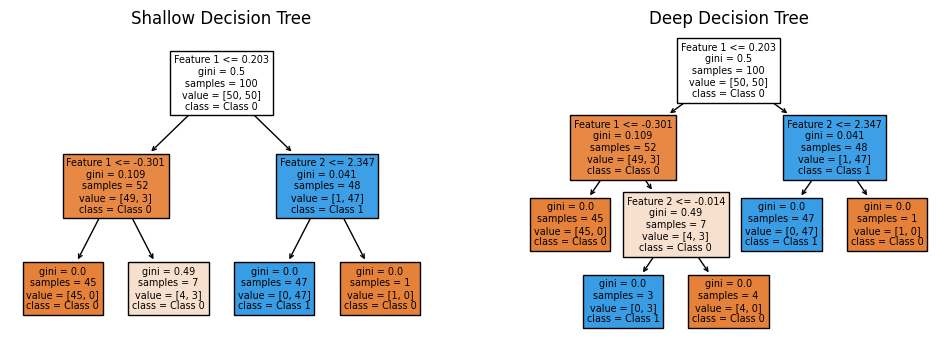

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Create a shallow Decision Tree
shallow_tree = DecisionTreeClassifier(max_depth=2)
shallow_tree.fit(X, y)

# Create a deep Decision Tree
deep_tree = DecisionTreeClassifier(max_depth=None)
deep_tree.fit(X, y)

# Plot shallow tree
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
tree.plot_tree(shallow_tree, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title('Shallow Decision Tree')

# Plot deep tree
plt.subplot(1, 2, 2)
tree.plot_tree(deep_tree, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title('Deep Decision Tree')

plt.show()

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree without pruning
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Train a Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Output the accuracies before applying techniques
print(f"Accuracy of Decision Tree (without pruning): {acc_dt}")
print(f"Accuracy of Random Forest: {acc_rf}")

# Apply post-pruning to the Decision Tree
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
cv_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    scores = clf.score(X_test, y_test)
    cv_scores.append(scores.mean())
best_alpha = ccp_alphas[np.argmax(cv_scores)]
dt_clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_clf_pruned.fit(X_train, y_train)
y_pred_dt_pruned = dt_clf_pruned.predict(X_test)
acc_dt_pruned = accuracy_score(y_test, y_pred_dt_pruned)

# Output the accuracy after applying post-pruning to the Decision Tree
print(f"Accuracy of Decision Tree (with pruning): {acc_dt_pruned}")


Accuracy of Decision Tree (without pruning): 0.9415204678362573
Accuracy of Random Forest: 0.9707602339181286
Accuracy of Decision Tree (with pruning): 0.9649122807017544


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier without tuning
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_rf_before = accuracy_score(y_test, y_pred_rf)

# Print the accuracy before tuning
print(f"Accuracy of Random Forest before tuning: {acc_rf_before}")

# Tune the Random Forest classifier by adjusting max_depth
rf_clf_tuned = RandomForestClassifier(max_depth=5, random_state=42)
rf_clf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_clf_tuned.predict(X_test)
acc_rf_after = accuracy_score(y_test, y_pred_rf_tuned)

# Print the accuracy after tuning
print(f"Accuracy of Random Forest after tuning: {acc_rf_after}")


Accuracy of Random Forest before tuning: 0.9707602339181286
Accuracy of Random Forest after tuning: 0.9649122807017544
